Hello, this is notebook for Depression observation. All the data I get from Kaggle. Link to the data with clear explanation: https://www.kaggle.com/arashnic/the-depression-dataset?select=data 

The purpose of this notebook is to observe how different types of diseases affect to patient's activity.

At the end based on how patient's condition flew I will try to find his type of disease, final MARDS score 

Patients in Control group are test group which I will discover after analyzing scores.csv and condition group patients

In [1]:
import pandas as pd
import numpy as np

Columns description for scores file:
    1. Number: unique identifier for patient
    2. Days: number of days observed
    3. Gender: 1 female, 2 male
    4. Age: age range of patient
    5. Afftype: 1 bipolar second, 2 unipolar depressive, bipolar first
    6. Melanch: 1 melancholia, 2 no melancholia
    7. Inpatient: 1 inpatient (in hospital), 2 outpatient (ambulatory care)
    8. Edu: education grouped in years
    9. Marriage: 1 married/cohabiting, 2 single
    10. Work: 1 working/studing, 2 unemployed/ sick leave/ pension
    11. madrs1: MADRS score when measurement started
    12. madrs2: MADRS score when measurement stopped

In [2]:
scores = pd.read_csv('data/scores.csv')
scores = pd.DataFrame(scores)
scores.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0


In [3]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


How files condition and control files look like:

In [4]:
condition_path = 'data/condition/'

cond_1 = pd.read_csv(condition_path + 'condition_1.csv')

cond_1.head()

,timestamp,date,activity
0,2003-05-07 12:00:00,2003-05-07,0
1,2003-05-07 12:01:00,2003-05-07,143
2,2003-05-07 12:02:00,2003-05-07,0
3,2003-05-07 12:03:00,2003-05-07,20
4,2003-05-07 12:04:00,2003-05-07,166


Exploring scores dataset

Scores will be our base point from which I will group patients (e.g. by affect type or inpatient status, e.t.c.)

### Days observed: Let's look in generall how many days patients were observed

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

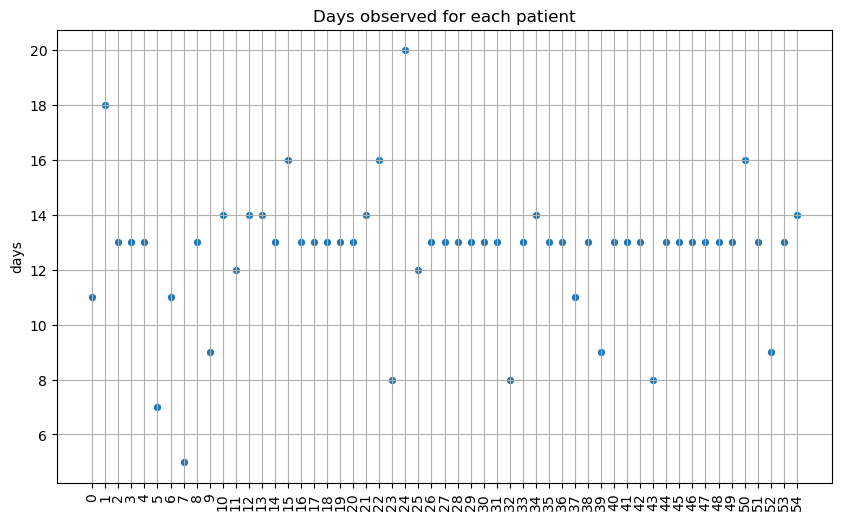

In [6]:
plt.figure(figsize= (10, 6), dpi = 100)

plt.title('Days observed for each patient')
sns.scatterplot(data = scores, x=range(55), y = 'days')

plt.xticks(range(55), rotation = 90)
plt.grid()
plt.show()

plt.close()

Output: Most of the patients were observed from 8 days up to 16. Most popular is 13 days.

Now, I have set for which I should predict their disease types (Control group) and condition group. Let's see split them into colors

For my own comfortability, I will create two more columns in scores: id and group type (0 for condition) and (1 for control)

In [7]:
for i in range(1, len(scores['number']) + 1):
    scores.loc[i - 1, 'id'] = int(i)

In [8]:
scores.loc[scores['id'] < 24, 'group'] = 0
scores.loc[scores['id'] > 23, 'group'] = 1

scores.tail(3)

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,id,group
52,control_30,9,2,35-39,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,53.0,1.0
53,control_31,13,1,20-24,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,54.0,1.0
54,control_32,14,2,25-29,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,55.0,1.0


Now lets scatter plot data again this time with respect to group column

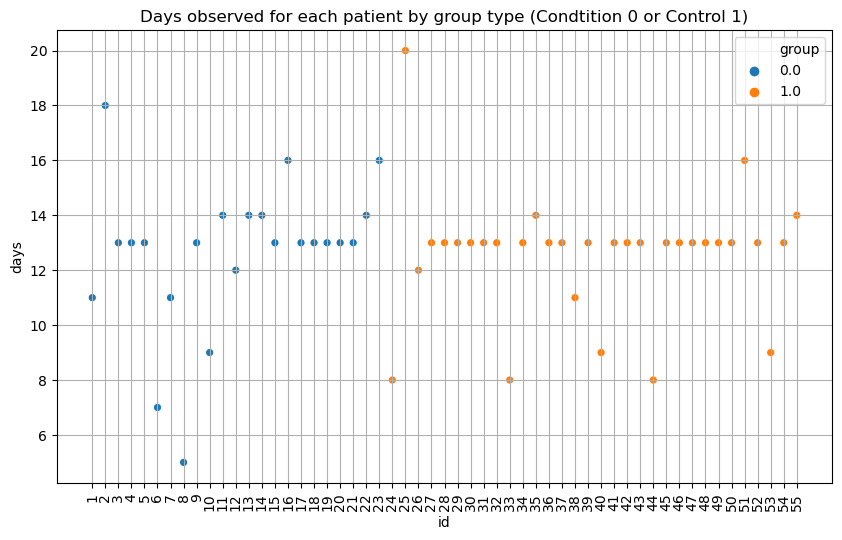

In [9]:
plt.figure(figsize= (10, 6), dpi = 100)

plt.title('Days observed for each patient by group type (Condtition 0 or Control 1)')
sns.scatterplot(data = scores, x='id', y = 'days', hue = 'group')

plt.xticks(scores['id'], rotation = 90)
plt.grid()
plt.show()

plt.close()

Output: for control group, we don't have that much variance as we have in condition group. Number of days itself, I think will not describe a lot of insights. But in combination with other attributes it will help us to normalize our hypothesis

### Sex

Let's check distribution by sex with the help of boxplot

In [10]:
by_gender = scores.groupby('gender')['id'].count()

by_gender

gender
1    30
2    25
Name: id, dtype: int64

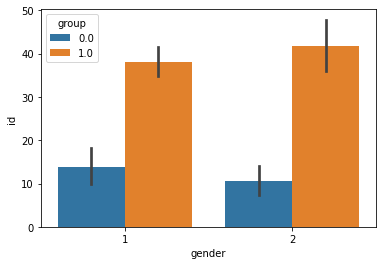

In [11]:
sns.barplot(x = 'gender', y ='id', data = scores, hue = 'group')

In [12]:
len(scores[(scores['group'] == 1) & (scores['gender'] == 2)]) / len(scores[scores['group'] == 1]) 

0.375

In [13]:
len(scores[(scores['group'] == 1) & (scores['gender'] == 1)]) / len(scores[scores['group'] == 1]) 

0.625

In [14]:
len(scores[(scores['group'] == 0) & (scores['gender'] == 2)]) / len(scores[scores['group'] == 0]) 

0.5652173913043478

In [15]:
len(scores[(scores['group'] == 0) & (scores['gender'] == 1)]) / len(scores[scores['group'] == 0])

0.43478260869565216

We can see from this numbers that in condition group there Males are dominating in numbers and in Control group female are dominant

### Age

Also, for comfort analyzing i would divide age column into two min_age and max_age.

In [16]:
def get_min_age(value):
    return int(value.split('-')[0])

def get_max_age(value):
    return int(value.split('-')[1])



scores['min_age'] = scores['age'].apply(lambda value: get_min_age(value))

scores['max_age'] = scores['age'].apply(lambda value: get_max_age(value))

scores.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,id,group,min_age,max_age
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,1.0,0.0,35,39
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,2.0,0.0,40,44
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,3.0,0.0,45,49
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,4.0,0.0,25,29
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,5.0,0.0,50,54


Let's look at whole range

In [17]:
scores['min_age'].min()

20

In [18]:
scores['max_age'].max()

69

In [19]:
print(f"Patients age start from {scores['min_age'].min()} up to {scores['max_age'].max()}")

Patients age start from 20 up to 69


It does not mean that mostly people suffer from depression in this range, but our 55 patients are in this range

Now let's check distribution by age

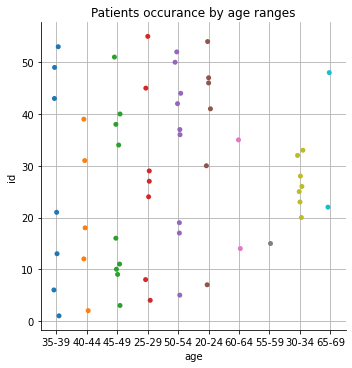

In [20]:
sns.catplot('age', 'id', data = scores)

plt.grid()

plt.title('Patients occurance by age ranges')

plt.show()
plt.close()

In [21]:
by_age = scores.groupby('age')['id'].count()

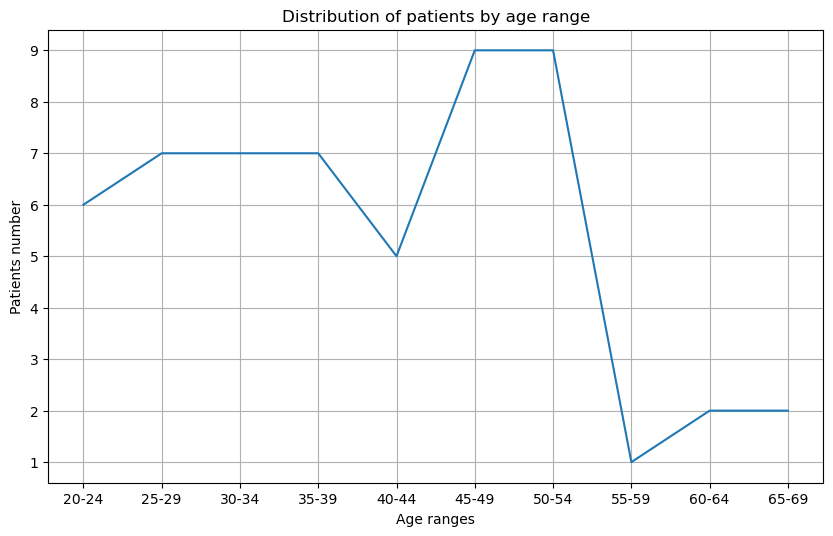

In [22]:
plt.figure(figsize=(10, 6), dpi = 100)


plt.title('Distribution of patients by age range')

plt.plot(by_age.index, by_age.values)

plt.ylabel('Patients number')
plt.xlabel('Age ranges')

plt.grid()

plt.show()

plt.close()

This set is not normally distributed. Mostly from depression suffer people in 40-54 age interval

Now let's check distribution in age by groups

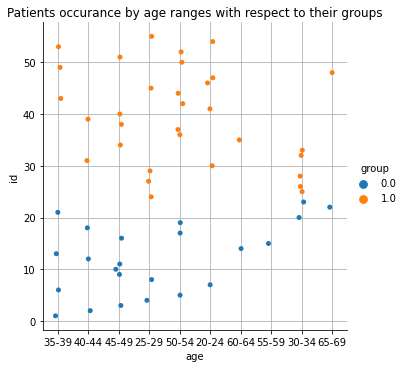

In [23]:
sns.catplot('age', 'id',hue = 'group', data = scores)

plt.grid()

plt.title('Patients occurance by age ranges with respect to their groups')

plt.show()
plt.close()

In [24]:
control = scores[scores['group'] == 1]

condition = scores[scores['group'] == 0]

cond_by_age = condition.groupby('age')['id'].count()

cont_by_age = control.groupby('age')['id'].count() 

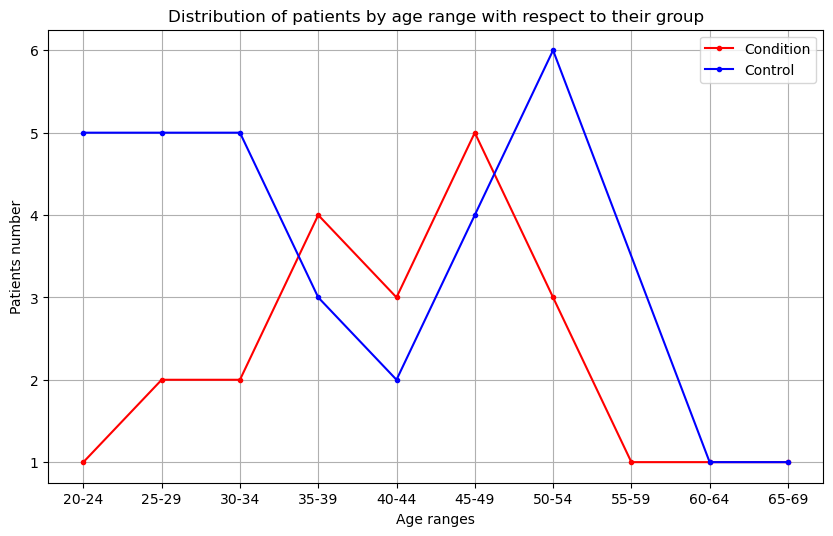

In [25]:
plt.figure(figsize=(10, 6), dpi = 100)


plt.title('Distribution of patients by age range with respect to their group')

plt.plot(cond_by_age.index, cond_by_age.values, 'r.-')
plt.plot(cont_by_age.index, cont_by_age.values, 'b.-')


plt.ylabel('Patients number')
plt.xlabel('Age ranges')

plt.grid()

plt.legend(['Condition', 'Control'])

plt.show()

plt.close()

Condition and Control groups are not obeyed by same distribution.

Also, let's check  how different gender seperated by age ranges

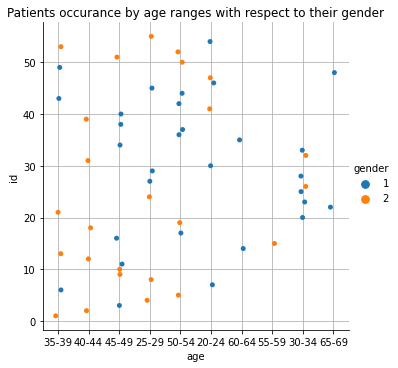

In [26]:
sns.catplot('age', 'id',hue = 'gender', data = scores)

plt.grid()

plt.title('Patients occurance by age ranges with respect to their gender')

plt.show()
plt.close()

In [27]:
def proportions_of_age_ranges(age):
    male = len(scores[(scores['age'] == age) & (scores['gender'] == 2)])
    
    female = len(scores[(scores['age'] == age) & (scores['gender'] == 1)])
    
    overall = male + female
    
    return f'proportion of male: {round(male / overall, 3)} and female: {round(female / overall, 3)} in age group {age}, overall there {overall} patients'

proportions_of_age_ranges('35-39')

'proportion of male: 0.571 and female: 0.429 in age group 35-39, overall there 7 patients'

In [28]:
for age_range in cond_by_age.index:
    print(proportions_of_age_ranges(age_range))

proportion of male: 0.333 and female: 0.667 in age group 20-24, overall there 6 patients
proportion of male: 0.571 and female: 0.429 in age group 25-29, overall there 7 patients
proportion of male: 0.286 and female: 0.714 in age group 30-34, overall there 7 patients
proportion of male: 0.571 and female: 0.429 in age group 35-39, overall there 7 patients
proportion of male: 1.0 and female: 0.0 in age group 40-44, overall there 5 patients
proportion of male: 0.333 and female: 0.667 in age group 45-49, overall there 9 patients
proportion of male: 0.444 and female: 0.556 in age group 50-54, overall there 9 patients
proportion of male: 1.0 and female: 0.0 in age group 55-59, overall there 1 patients
proportion of male: 0.0 and female: 1.0 in age group 60-64, overall there 2 patients
proportion of male: 0.0 and female: 1.0 in age group 65-69, overall there 2 patients


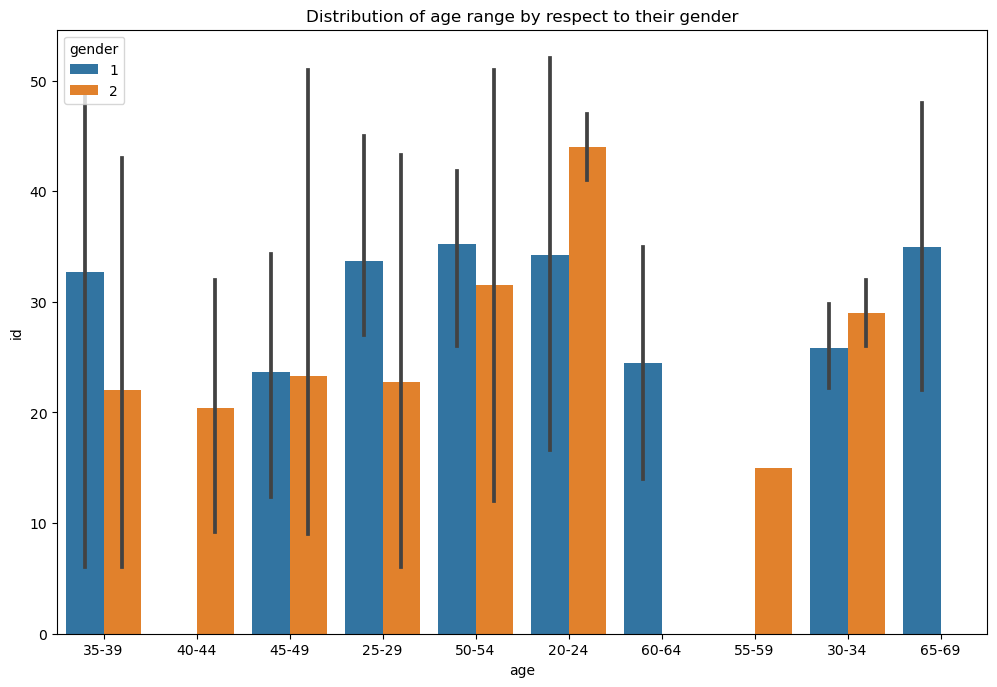

In [29]:
plt.figure(figsize=(12, 8), dpi = 100)

plt.title('Distribution of age range by respect to their gender')

sns.barplot(x = 'age', y = 'id', hue = 'gender', data = scores)

plt.show()

plt.close()

Output: as there only 55 patients we can't deploy this hypothesises to all people. But, at the early age patients number is high, also from 20-25 mosly suffer men and then till 40 women

### Affect type

In [30]:
by_type = scores.groupby('afftype')['id'].count()

In [31]:
by_type

afftype
1.0     7
2.0    15
3.0     1
Name: id, dtype: int64

We can there only one patient with bipolar first disorder, 7 with bipolar second and 15 with unipolar depressive. Meaning that most people from condition group are used to have low activity level by time.

Days oberved with affect type

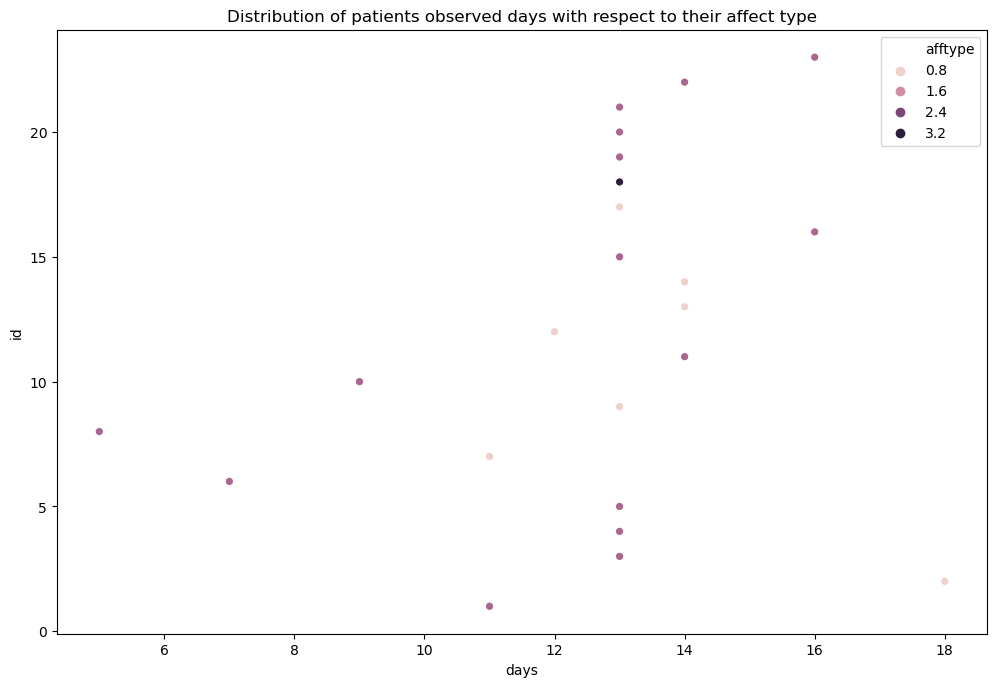

In [32]:
plt.figure(figsize = (12, 8), dpi = 100)


plt.title('Distribution of patients observed days with respect to their affect type')

sns.scatterplot('days', 'id', hue = 'afftype', data = scores)

plt.show()

plt.close()

Not so easy to understand this graph, now let's visualize it in another way

No handles with labels found to put in legend.


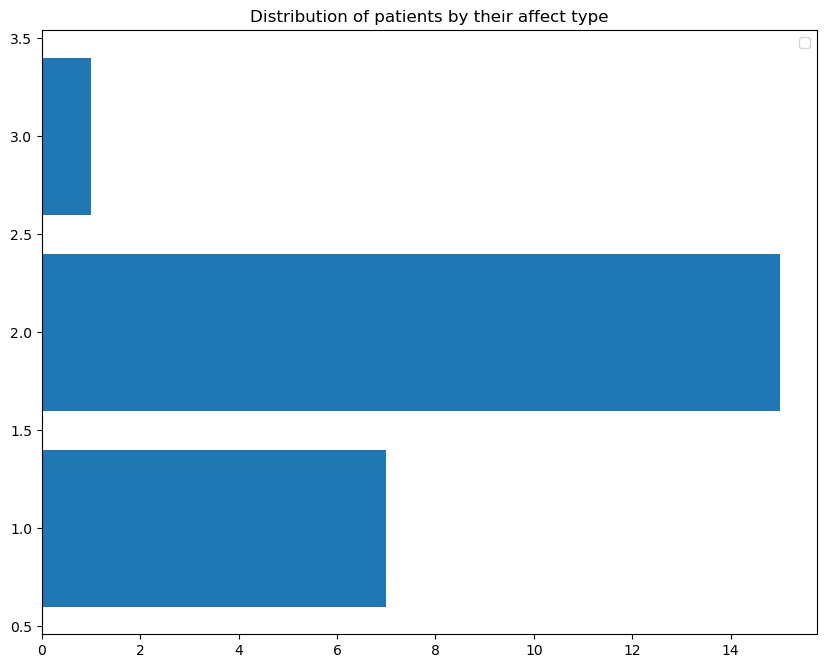

In [33]:
plt.figure(figsize = (10, 8), dpi = 100)

plt.title('Distribution of patients by their affect type')

plt.barh(by_type.index, by_type.values)



plt.legend()


plt.show()

plt.close()

It looks more understandable now

Now, let's check correlation between affect type and number of days observed

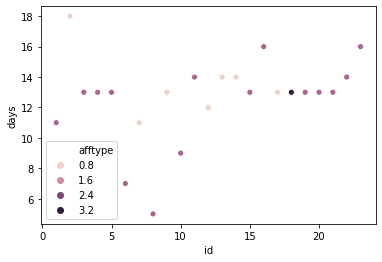

In [34]:
sns.scatterplot(x = 'id', y = 'days', hue = 'afftype', data = scores)

I think it will be better to create new column for afftype with their string type

In [35]:
def to_obj(value):
    if value == 1:
        return 'Bipolar second'
    elif value == 2:
        return 'Unipolar depressive'
    elif value == 3:
        return 'Bipolar first'
    else:
        return None
scores['aff_type'] = scores['afftype'].apply(lambda x: to_obj(x))

scores.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,id,group,min_age,max_age,aff_type
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,1.0,0.0,35,39,Unipolar depressive
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,2.0,0.0,40,44,Bipolar second
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,3.0,0.0,45,49,Unipolar depressive
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,4.0,0.0,25,29,Unipolar depressive
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,5.0,0.0,50,54,Unipolar depressive


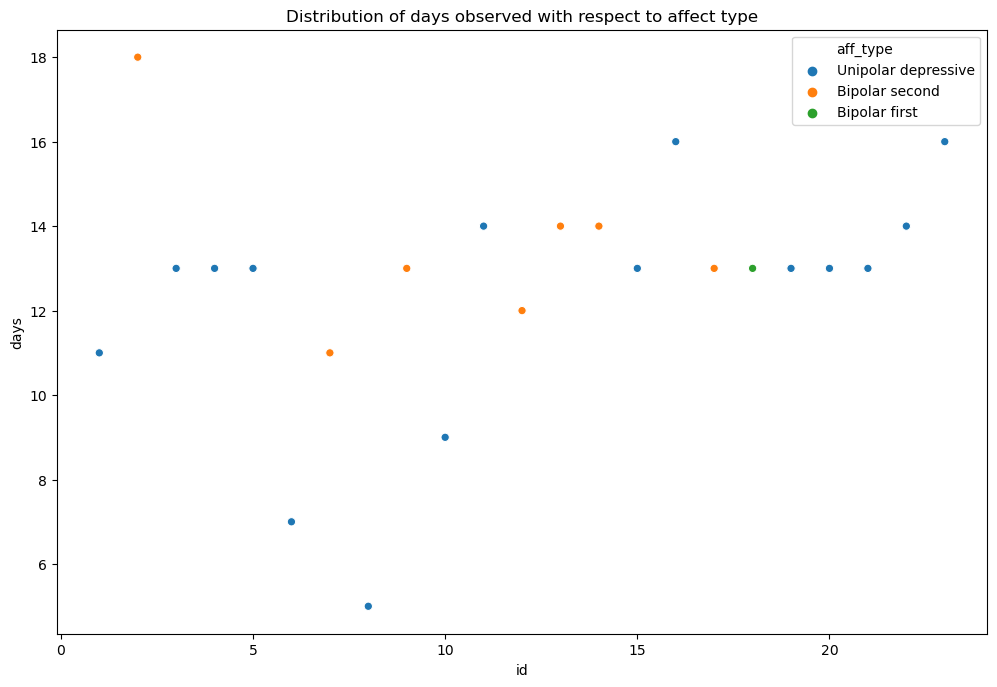

In [36]:
plt.figure(figsize=(12, 8), dpi =100)

plt.title('Distribution of days observed with respect to affect type')

sns.scatterplot(x = 'id', y = 'days', hue = 'aff_type', data = scores)

plt.show()

plt.close()

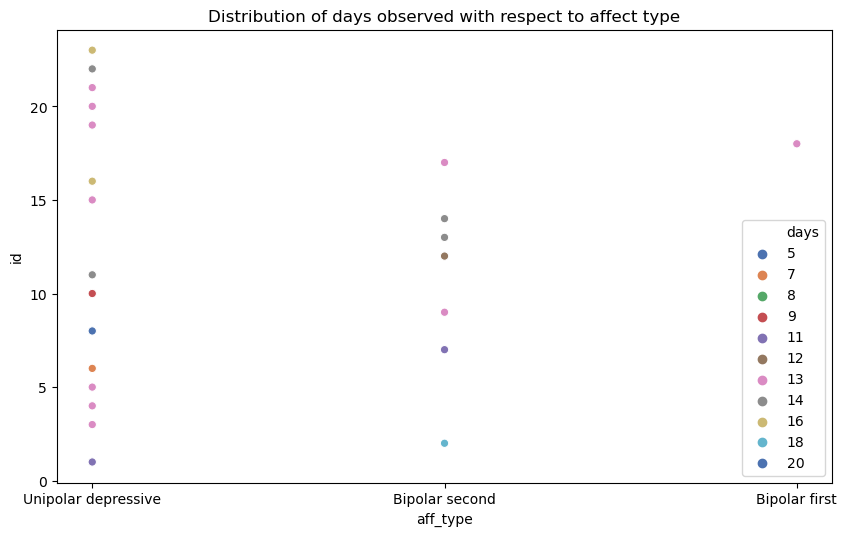

In [37]:
plt.figure(figsize=(10, 6), dpi =100)

plt.title('Distribution of days observed with respect to affect type')

sns.scatterplot(x = 'aff_type', y = 'id', hue = 'days', data = scores, palette = 'deep')

plt.show()

plt.close()

Days observed by gender with respect to their affect type

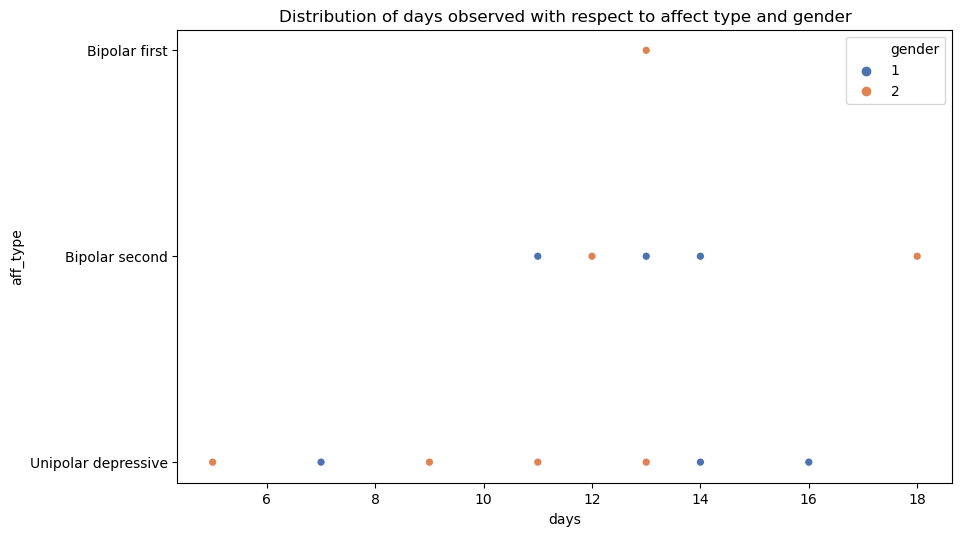

In [38]:
plt.figure(figsize=(10, 6), dpi =100)

plt.title('Distribution of days observed with respect to affect type and gender')

sns.scatterplot(x = 'days', y = 'aff_type', hue = 'gender', data = scores, palette = 'deep')

plt.show()

plt.close()

Finally let's see correlation age_ranges with affect type

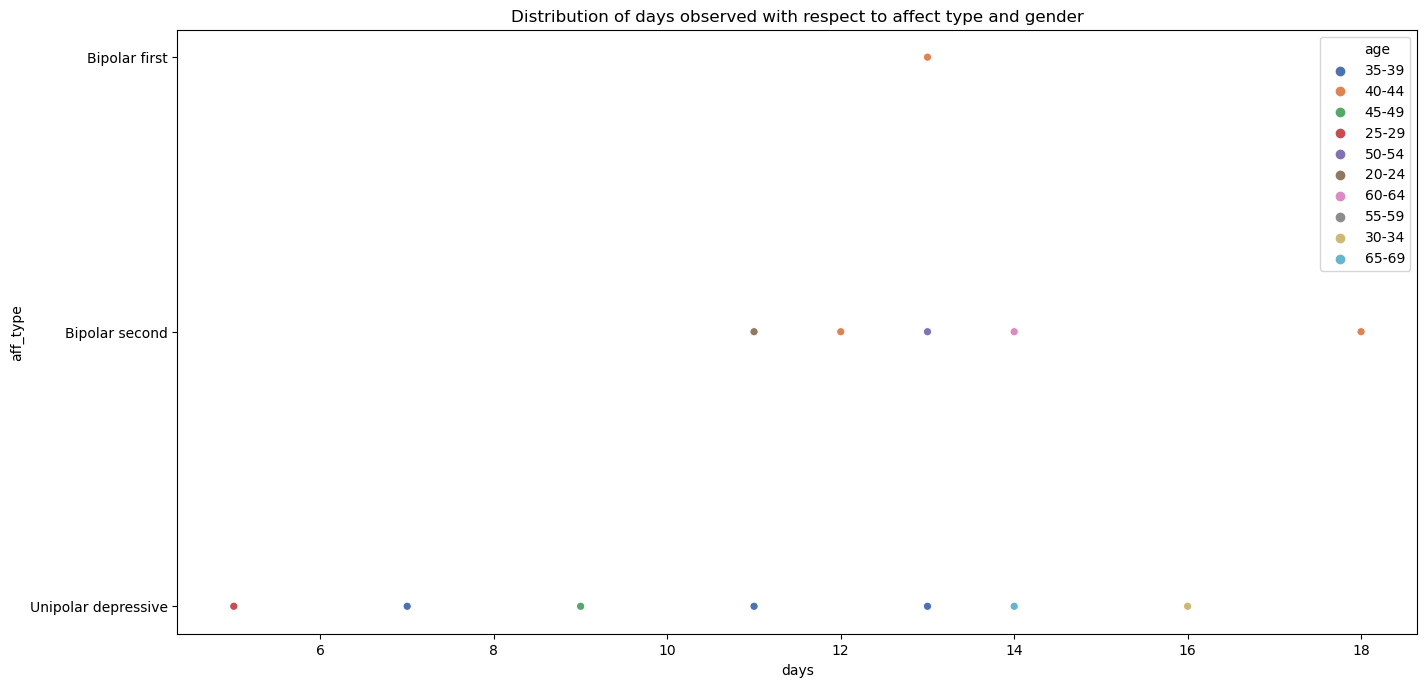

In [39]:
plt.figure(figsize=(16, 8), dpi =100)

plt.title('Distribution of days observed with respect to affect type and gender')

sns.scatterplot(x = 'days', y = 'aff_type', hue = 'age', data = scores, palette = 'deep')

plt.show()

plt.close()

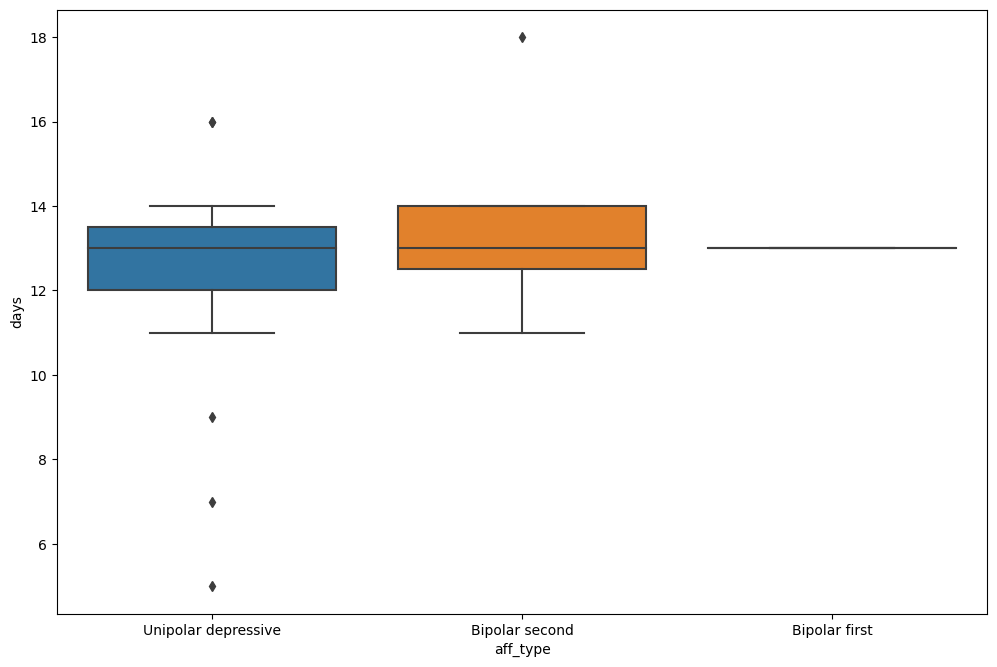

In [40]:
plt.figure(figsize=(12, 8), dpi = 100)

sns.boxplot(x = 'aff_type', y = 'days', data = scores)

plt.show()

plt.close()

What we can see here is in general most of data lies between 10 and 15 days and Unipolar type has outliers. Instead of saving every observed days I can create new one observed_level which will take 1 if days are few, 2 if it is in standard range and 3 if days are too many

In [41]:
def observed_level(value):
    if value < 10:
        return 1
    elif (value >= 10) and (value <= 15):
        return 2
    elif value > 15:
        return 3
    
scores['observed_level'] = scores['days'].apply(lambda x: observed_level(x))

scores.tail()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,id,group,min_age,max_age,aff_type,observed_level
50,control_28,16,2,45-49,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,51.0,1.0,45,49,None,3
51,control_29,13,2,50-54,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,52.0,1.0,50,54,None,2
52,control_30,9,2,35-39,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,53.0,1.0,35,39,None,1
53,control_31,13,1,20-24,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,54.0,1.0,20,24,None,2
54,control_32,14,2,25-29,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,55.0,1.0,25,29,None,2


### Melancholia

1 with melancholia, 2 without

In [42]:
has_melanch = scores.groupby('melanch')['id'].count()

has_melanch

melanch
1.0     1
2.0    19
Name: id, dtype: int64

We can see here only one person from has melancholia from condition group and I think i should drop this attribute

In [43]:
scores.drop('melanch', axis = 1, inplace = True)

### Inpatient

In [44]:
inpatient = scores.groupby('inpatient')['id'].count()

inpatient

inpatient
1.0     5
2.0    18
Name: id, dtype: int64

From observation group, we have 6 people who were treated in hospital and 18 outpatient

Let's check who were treated in hospital. I assume that 5 people were treated in hospital due to their condition.

In [45]:
inhosp = scores[scores['inpatient'] == 1]

inhosp

,number,days,gender,age,afftype,inpatient,edu,marriage,work,madrs1,madrs2,id,group,min_age,max_age,aff_type,observed_level
18,condition_19,13,2,50-54,2.0,1.0,16-20,2.0,2.0,26.0,21.0,19.0,0.0,50,54,Unipolar depressive,2
19,condition_20,13,1,30-34,2.0,1.0,6-10,1.0,2.0,27.0,25.0,20.0,0.0,30,34,Unipolar depressive,2
20,condition_21,13,2,35-39,2.0,1.0,6-10,2.0,2.0,26.0,21.0,21.0,0.0,35,39,Unipolar depressive,2
21,condition_22,14,1,65-69,2.0,1.0,,2.0,2.0,29.0,28.0,22.0,0.0,65,69,Unipolar depressive,2
22,condition_23,16,1,30-34,2.0,1.0,16-20,2.0,2.0,29.0,23.0,23.0,0.0,30,34,Unipolar depressive,3


What we already can notice is all of them have Unipolar depressive type meaning that it may flow harder than bipolar diseases, but we should also not forget that most of people in this set suffering from Unipolar

Age for inpatient

Check the difference between inpatiens and outpatients, also with overall

In [46]:
print(f"Patients in hospital median minimum age is: {inhosp['min_age'].median()} \n Patients out hospital median minimum age is { scores[scores['inpatient'] == 2]['min_age'].median()} \
      \n Overall mimimum age is {scores['min_age'].median()}")

Patients in hospital median minimum age is: 35.0 
 Patients out hospital median minimum age is 42.5       
 Overall mimimum age is 40.0


I expected to see other result, but it may show this result cause most of our patients are in age range between 30 and 54

In [47]:
print(f"Patients in hospital mean minimum age is: {inhosp['min_age'].mean()} \n Patients out hospital mean minimum age is { scores[scores['inpatient'] == 2]['min_age'].mean()} \
      \n Overall mimimum mean age is {scores['min_age'].mean()}")

Patients in hospital mean minimum age is: 42.0 
 Patients out hospital mean minimum age is 40.833333333333336       
 Overall mimimum mean age is 38.36363636363637


After observing mean values, i decided to built visuualize data in ranges to see how many of them are inpatient and outpatient

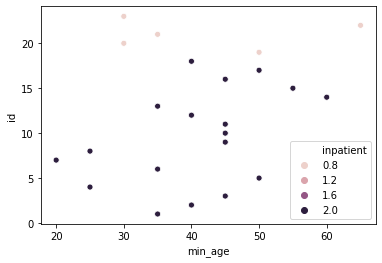

In [48]:
sns.scatterplot(x = 'min_age', y = 'id', hue = 'inpatient', data = scores)

Not so easy to understand

In [49]:
# Once again need to categorialize column

def inpatient(value):
    if value == 1:
        return 'Inpatient'
    elif value == 2:
        return 'Outpatient'
    else:
        return None

scores['treated'] = scores['inpatient'].apply(lambda x: inpatient(x))


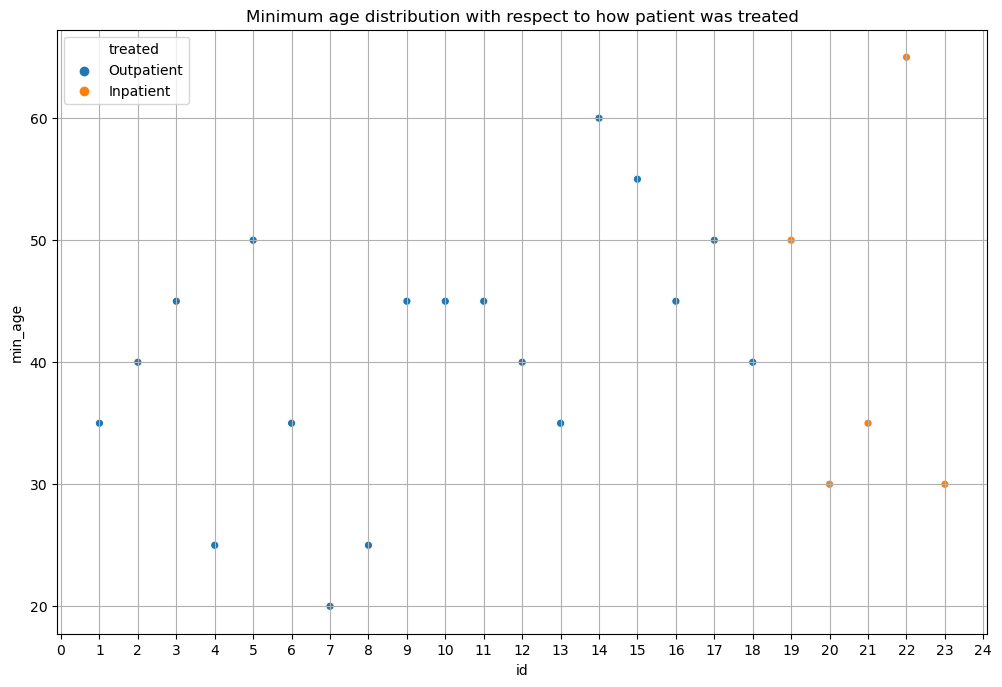

In [50]:
plt.figure(figsize=(12, 8), dpi = 100)

plt.title('Minimum age distribution with respect to how patient was treated')


sns.scatterplot(x = 'id', y = 'min_age', hue = 'treated', data = scores)

plt.xticks(range(0, 25))

plt.grid()

plt.show()

plt.close()

Most of people from 40 to 50 and 20 to 30 ages decided to treated out hospital. (30 - 40) seems to be neutral cause there 3 patients for each side. We have one patient older than 60 and she got treated in hospital

In [51]:
scores[scores['min_age'] > 60]

,number,days,gender,age,afftype,inpatient,edu,marriage,work,madrs1,madrs2,id,group,min_age,max_age,aff_type,observed_level,treated
21,condition_22,14,1,65-69,2.0,1.0,,2.0,2.0,29.0,28.0,22.0,0.0,65,69,Unipolar depressive,2,Inpatient
47,control_25,13,1,65-69,NaN,NaN,,NaN,NaN,NaN,NaN,48.0,1.0,65,69,None,2,None


I assume that gender do not affect to inpatient column

Also some interesting fact: All people who were treated in hospital are not working and mostly single. I think these two are decision making factors.

Let's check overall numbers

In [52]:
print(f"Out of {len(scores[scores['group'] == 0]['id'])} condition patients, {len(scores[scores['marriage'] == 2]['id'])} are single")

Out of 23 condition patients, 12 are single


Half of the group are single, and 1/3 of single people decide to treat in hospiltal, where 1/11 not single decided to treated in hospital

In [53]:
print(f"Out of {len(scores[scores['group'] == 0]['id'])} condition patients, {len(scores[scores['work'] == 2]['id'])} are not working")

Out of 23 condition patients, 20 are not working


I was surprised, but I should have to expect this. Because, depression in not a joke, and serious disease which won't let people live as everything is ok.

Let's check employeed people who have depression 

In [54]:
scores[scores['work'] == 1]

,number,days,gender,age,afftype,inpatient,edu,marriage,work,madrs1,madrs2,id,group,min_age,max_age,aff_type,observed_level,treated
3,condition_4,13,2,25-29,2.0,2.0,11-15,1.0,1.0,20.0,16.0,4.0,0.0,25,29,Unipolar depressive,2,Outpatient
6,condition_7,11,1,20-24,1.0,2.0,11-15,2.0,1.0,24.0,25.0,7.0,0.0,20,24,Bipolar second,2,Outpatient
14,condition_15,13,2,55-59,2.0,2.0,11-15,1.0,1.0,14.0,18.0,15.0,0.0,55,59,Unipolar depressive,2,Outpatient


What we can see here: obviously they were treated out of hospital; 2 males and 1 female. Both of men have Unipolar depressive disease and feamle has Bipolar second type

### Education

In [55]:
scores.groupby('edu')['id'].count()

edu
         31
11-15     8
16-20     2
6-10     12
Name: id, dtype: int64

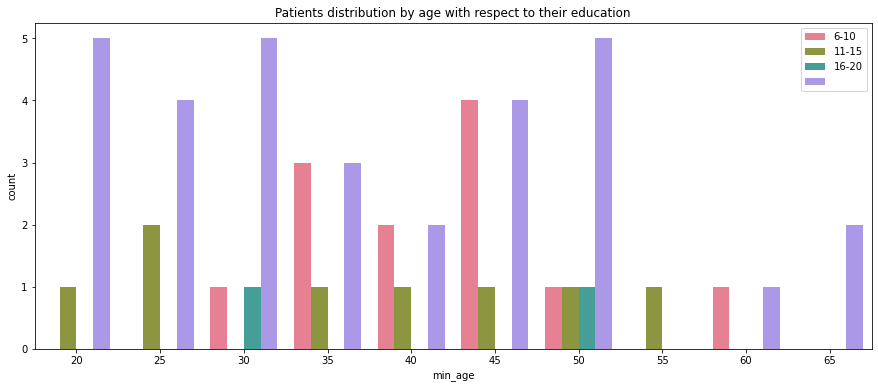

In [56]:
plt.figure(figsize=(15,6))

plt.title('Patients distribution by age with respect to their education')

sns.countplot(x='min_age', data = scores, hue = 'edu', palette='husl')

plt.legend(loc='upper right')

plt.show()

plt.close()

Mostly, for control group and some condition groups education status is not available

### MADRS Scores

Little bit about this test. Next to the HAM-D17, the MADRS is the most commonly used outcome measure in antidepressant efficacy trials and has been used with increasing frequency during the past decade. The main purpose of this scale is to assess depressive symptomology, particularly change in patients treated with antidepressants. While the HAM-D17 includes items that address somatic symptoms, the MADRS focuses on the psychological symptoms of depression (e.g., sadness, tension, and pessimistic thoughts). This scale is clinician-rated and consists of 10 items; each item is rated on a 0-6 scale, resulting in a maximum total score of 60 points, with higher scores indicative of greater depressive symptomology. The MADRS scoring instructions indicate that a total score ranging from 0 to 6 indicates that the patient is in the normal range (no depression), a score ranging from 7 to 19 indicates “mild depression,” 20 to 34 indicates “moderate depression,” a score of 35 and greater indicates “severe depression,” and a total score of 60 or greater indicates “very severe depression.” There is evidence that an improvement of two points or more on the MADRS is considered clinically relevant.

First of all let's check how efficient of treatment for every patient

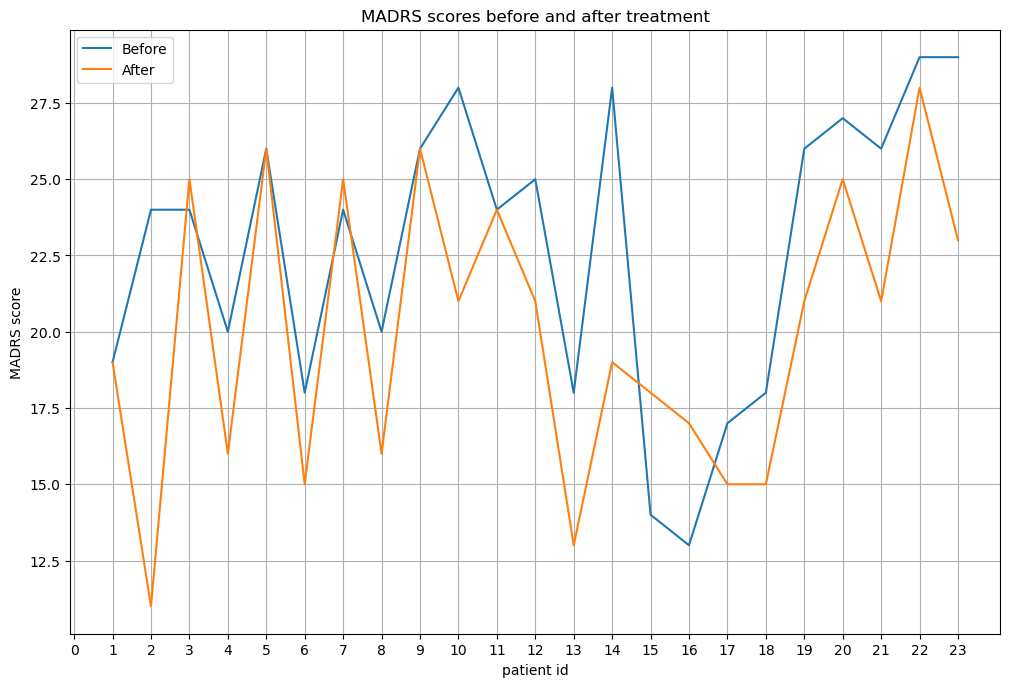

In [57]:
plt.figure(figsize=(12, 8), dpi =100)

plt.plot(scores['id'][:23], scores['madrs1'][:23])

plt.plot(scores['id'][:23], scores['madrs2'][:23])

plt.xticks(range(24))

plt.title('MADRS scores before and after treatment')

plt.xlabel('patient id')
plt.ylabel('MADRS score')

plt.grid()

plt.legend(['Before', 'After'])

plt.show()

plt.close()

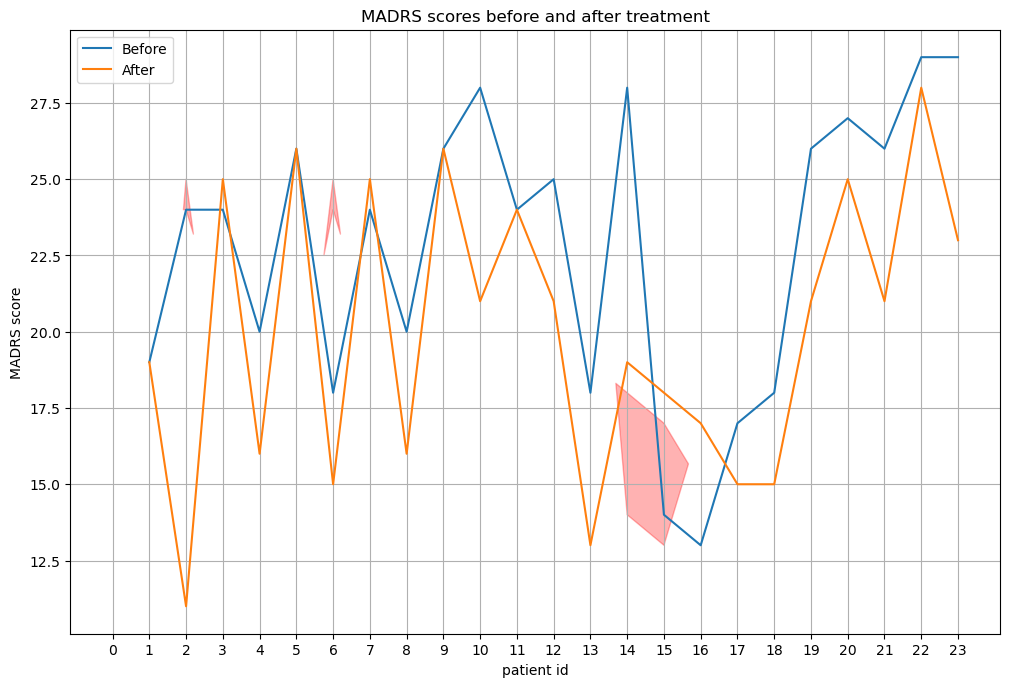

In [58]:
plt.figure(figsize=(12, 8), dpi =100)

plt.plot(scores['id'][:24], scores['madrs1'][:24])

plt.plot(scores['id'][:24], scores['madrs2'][:24])
plt.fill_between(range(len(scores['id'][:24])), scores['madrs1'][:24], scores['madrs2'][:24], where = (scores['madrs1'][:24] <=  scores['madrs2'][:24]), interpolate=True, alpha=0.3, color='red')

plt.xticks(range(24))

plt.title('MADRS scores before and after treatment')

plt.xlabel('patient id')
plt.ylabel('MADRS score')

plt.grid()

plt.legend(['Before', 'After'])

plt.show()

plt.close() 

We can see the patients who's condition get worsen with red area 

Now i will create lists of patients: 
     1) patien who's condition got worsen; 
     2) patient who's condition did not change
     3) patient who's condition got better

Remark: list of patients who's condition did not change, will also include patients who's score changed only by few points.

In [59]:
scores.head(2)

,number,days,gender,age,afftype,inpatient,edu,marriage,work,madrs1,madrs2,id,group,min_age,max_age,aff_type,observed_level,treated
0,condition_1,11,2,35-39,2.0,2.0,6-10,1.0,2.0,19.0,19.0,1.0,0.0,35,39,Unipolar depressive,2,Outpatient
1,condition_2,18,2,40-44,1.0,2.0,6-10,2.0,2.0,24.0,11.0,2.0,0.0,40,44,Bipolar second,3,Outpatient


In [60]:
better, stable, worse = [], [], []

for p_id in range(1, 23):
   
    if abs(scores.loc[scores['id'] == p_id, 'madrs2'].values - scores.loc[scores['id'] == p_id, 'madrs1'].values) <= 2: # If changes in score are less equal 2, then I will define it as stable
        stable.append(p_id)
    
    elif scores.loc[scores['id'] == p_id, 'madrs1'].values > scores.loc[scores['id'] == p_id, 'madrs2'].values: # With the help of Elif we can now get only patients whose positions get better more than 2 points
        better.append(p_id)
    
    else: # If positions change not in range of 2 points and changes are not positive then, we will add it to worsen
        worse.append(p_id)
        
print(stable, better, worse)

[1, 3, 5, 7, 9, 11, 17, 20, 22] [2, 4, 6, 8, 10, 12, 13, 14, 18, 19, 21] [15, 16]


Well, I've grouped them and now, let's observe their characteristics

I want to start with smallest, yet I think important group for this work, patients who's condition got worsen in time of treatment

In [61]:
worsen = scores.loc[scores['id'].isin(worse)]
helped = scores.loc[scores['id'].isin(better)]
stand = scores.loc[scores['id'].isin(stable)]

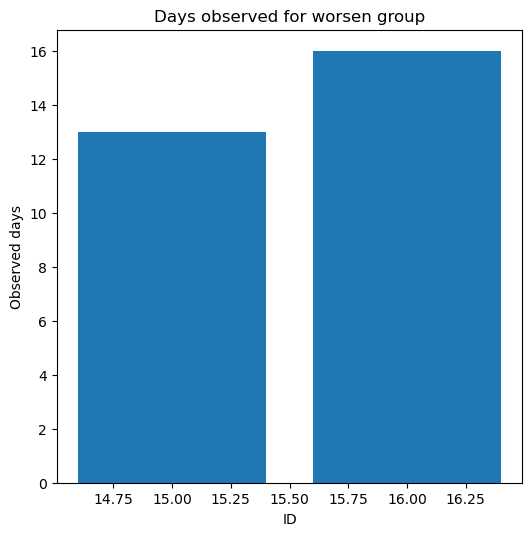

In [62]:
def bar_for_days(dataframe, name):
    ids = dataframe['id']
    
    values = dataframe['days']
    
    plt.figure(figsize=(6,6), dpi = 100)
    
    plt.title(f'Days observed for {name} group')
    
    plt.bar(ids, values)
    
    plt.xlabel('ID')
    plt.ylabel('Observed days')
    plt.show()
    
    plt.close()


bar_for_days(worsen, 'worsen')     

They were observed in standard range of days

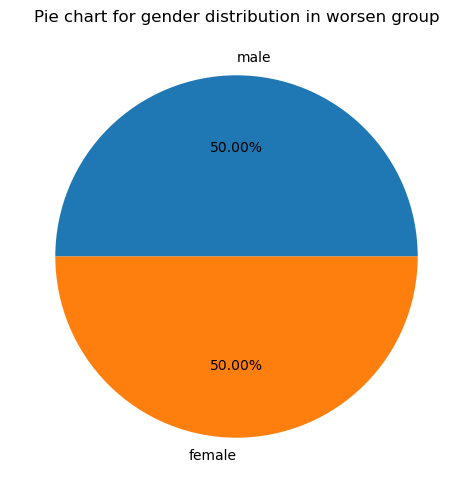

In [63]:
def pie_for_gender(dataframe, name):
    labels = ['male', 'female']
    
    sizes = [len(dataframe[dataframe['gender'] == 2]), len(dataframe[dataframe['gender'] == 1])]
    
    plt.figure(figsize=(6,6), dpi = 100)
    
    plt.title(f'Pie chart for gender distribution in {name} group')
    
    plt.pie(sizes, labels = labels, autopct='%1.2f%%')
    
    plt.show()
    
    plt.close()
    
pie_for_gender(worsen, 'worsen')

Well, there 2 patients: 1 male and 1 female

Next, I would like to create age distribution count plot for groups

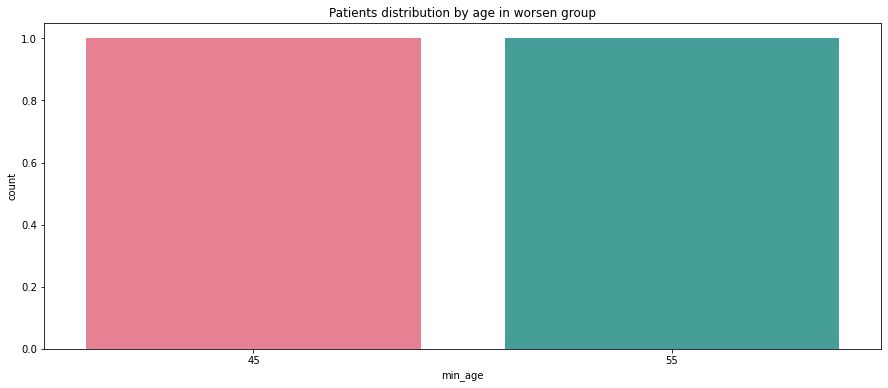

In [64]:
def countplot_for_ages(df, name):
    plt.figure(figsize=(15,6))

    plt.title(f'Patients distribution by age in {name} group')

    sns.countplot(x='min_age', data = df, palette='husl')

    plt.show()

    plt.close()
    
countplot_for_ages(worsen, 'worsen')

Yep, for this group functions look bit strange, but when I will try them for more populated groups it will do what it should

Let's create also simple pie charts for: marriage status and affect type

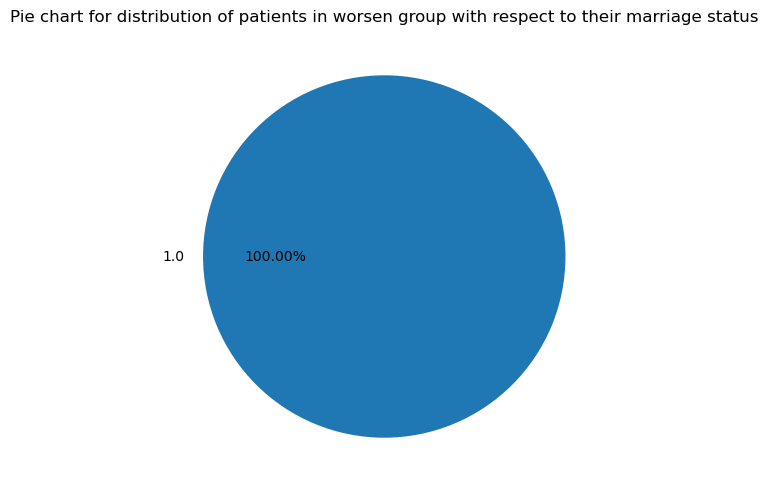

In [65]:
def pie_for_marriage(dataframe, name):
    labels = dataframe['marriage'].unique()
    
    sizes = [len(dataframe[dataframe['marriage'] == i]) for i in labels]  
    
    plt.figure(figsize=(6,6), dpi = 100)
    
    plt.title(f'Pie chart for distribution of patients in {name} group with respect to their marriage status')
    
    plt.pie(sizes, labels = labels, autopct='%1.2f%%')
    
    plt.show()
    
    plt.close()
    
pie_for_marriage(worsen, 'worsen')

Yep, both of them are not single

Are they working?

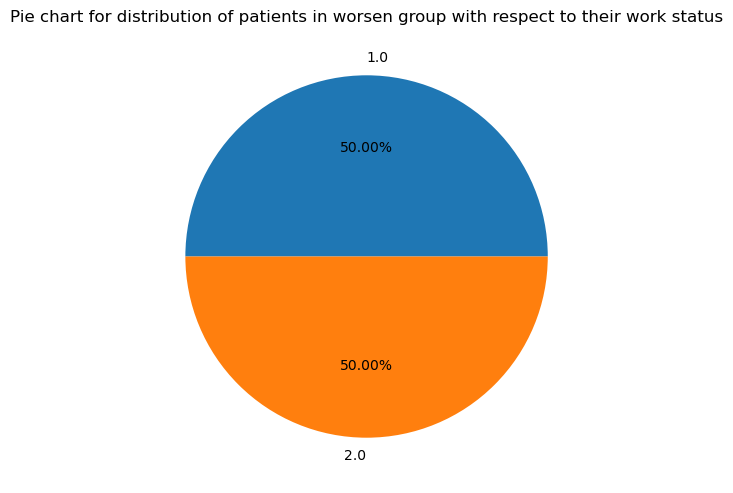

In [66]:
def pie_for_work(dataframe, name):
    labels = dataframe['work'].unique()
    
    sizes = [len(dataframe[dataframe['work'] == i]) for i in labels]  
    
    plt.figure(figsize=(6,6), dpi = 100)
    
    plt.title(f'Pie chart for distribution of patients in {name} group with respect to their work status')
    
    plt.pie(sizes, labels = labels, autopct='%1.2f%%')
    
    plt.show()
    
    plt.close()
    
pie_for_work(worsen, 'worsen')

I thought that, they may work, and it will put an extra effort to them which may cause depression in their state. But no, one of them not working

What are their disease type?

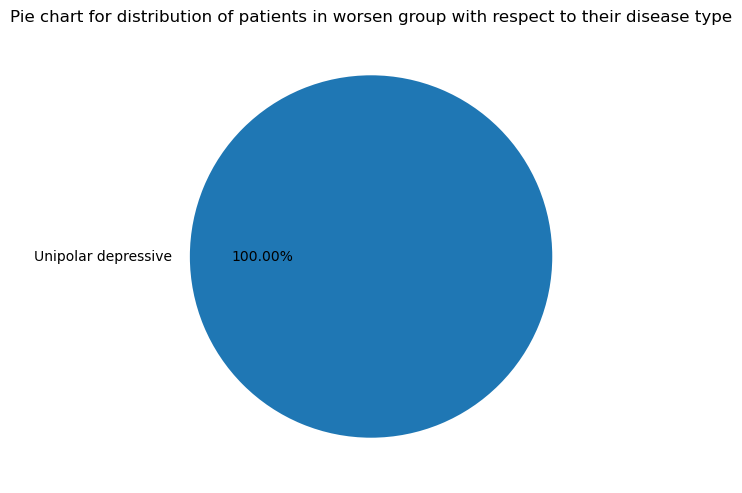

In [67]:
def pie_for_afftype(dataframe, name):
    labels = dataframe['aff_type'].unique()
    
    sizes = [len(dataframe[dataframe['aff_type'] == i]) for i in labels]  
    
    plt.figure(figsize=(6,6), dpi = 100)
    
    plt.title(f'Pie chart for distribution of patients in {name} group with respect to their disease type')
    
    plt.pie(sizes, labels = labels, autopct='%1.2f%%')
    
    plt.show()
    
    plt.close()
    
pie_for_afftype(worsen, 'worsen')

They both have Unipolar depressive type, which is most popular type in this dataset.

How they were treated?

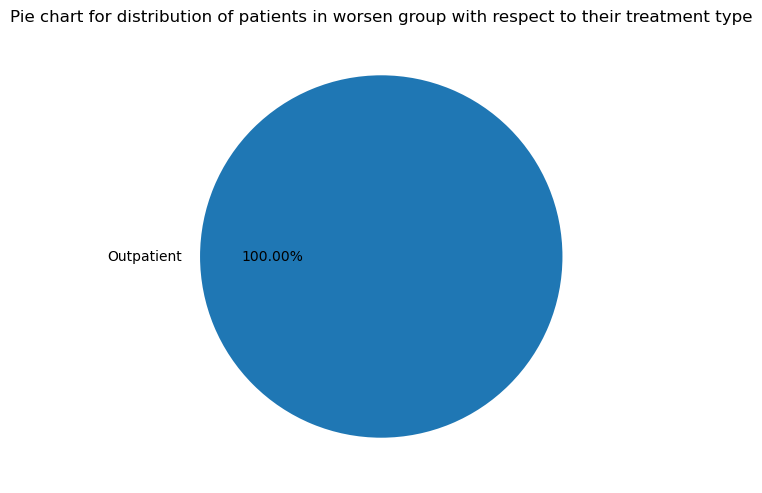

In [68]:
def pie_for_treatment(dataframe, name):
    labels = dataframe['treated'].unique()
    
    sizes = [len(dataframe[dataframe['treated'] == i]) for i in labels]  
    
    plt.figure(figsize=(6,6), dpi = 100)
    
    plt.title(f'Pie chart for distribution of patients in {name} group with respect to their treatment type')
    
    plt.pie(sizes, labels = labels, autopct='%1.2f%%')
    
    plt.show()
    
    plt.close()
    
pie_for_treatment(worsen, 'worsen')

Again, as most of patients overall, they were treated out of hospital.

I tried gain insight out of this two patients characteristics, but they look absolute standard patients in whole dataset. May be I will understand this patients special cases when I will observe each patient separately

### Patients that got better after treatment

I have already ready functions, let's use them for our data

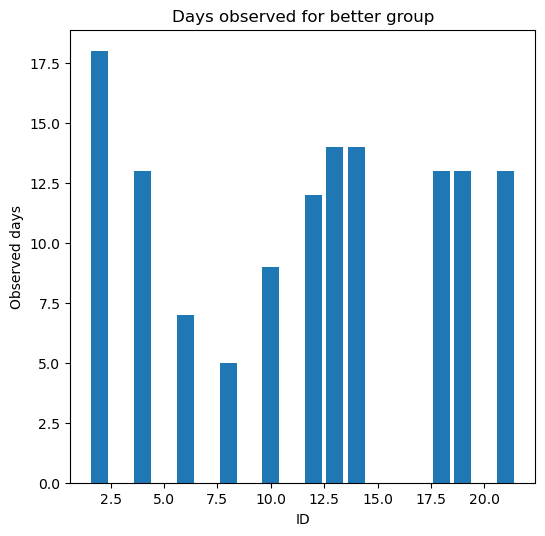

In [69]:
bar_for_days(helped, 'better') 

In general, mostly they were observed in standard range between 10 and 16 days, but we can see that some of them made huge progress just in one week

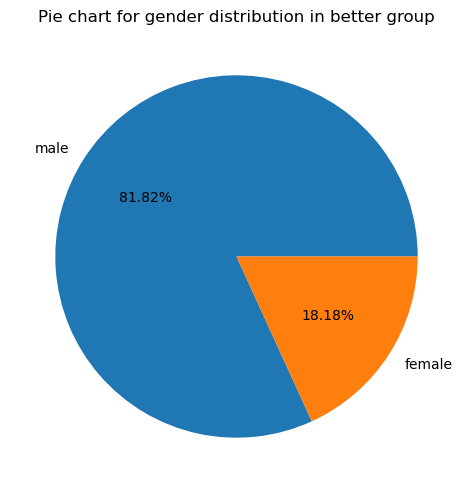

In [70]:
pie_for_gender(helped, 'better')

Most of patients in this group are males

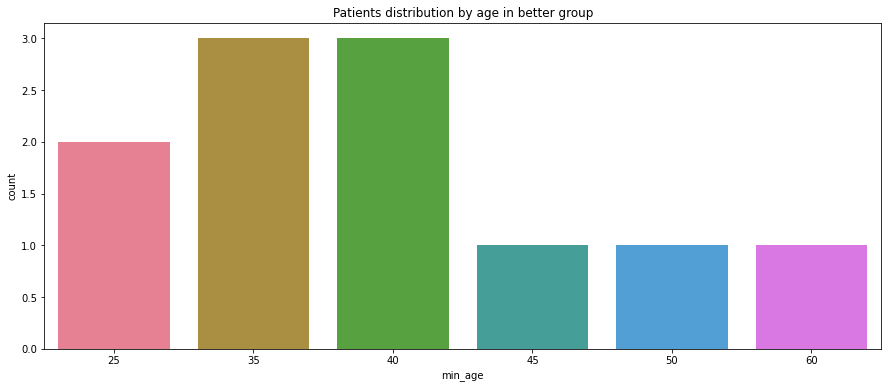

In [71]:
countplot_for_ages(helped, 'better')

Yep, as many of our data this one is also Right skewed

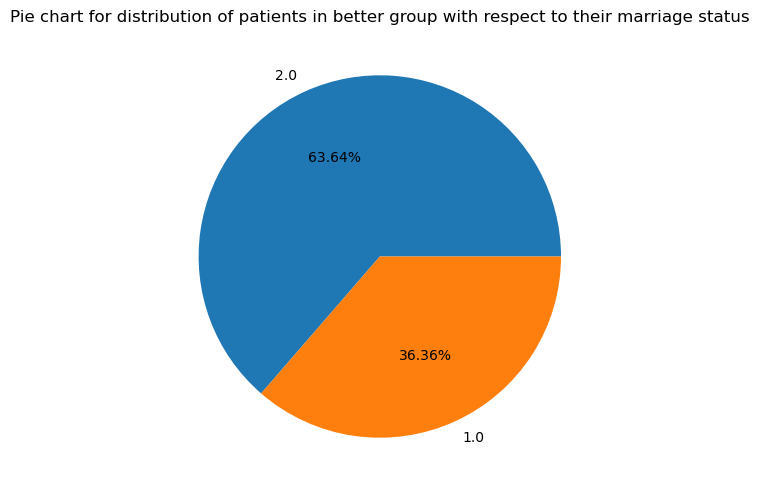

In [72]:
pie_for_marriage(helped, 'better')

Wow, this one looks bit different from general, most of patients who showed good progress were single

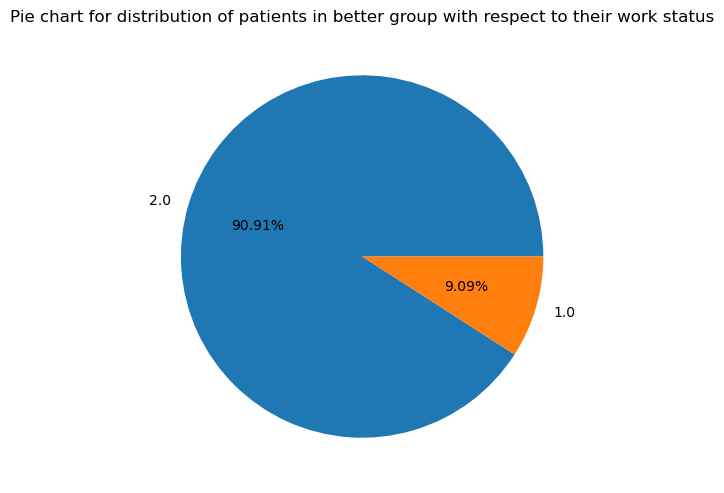

In [73]:
pie_for_work(helped, 'better')

We have here, patient who worked at same time and still managed to show improvements! Huge respect, nothing else

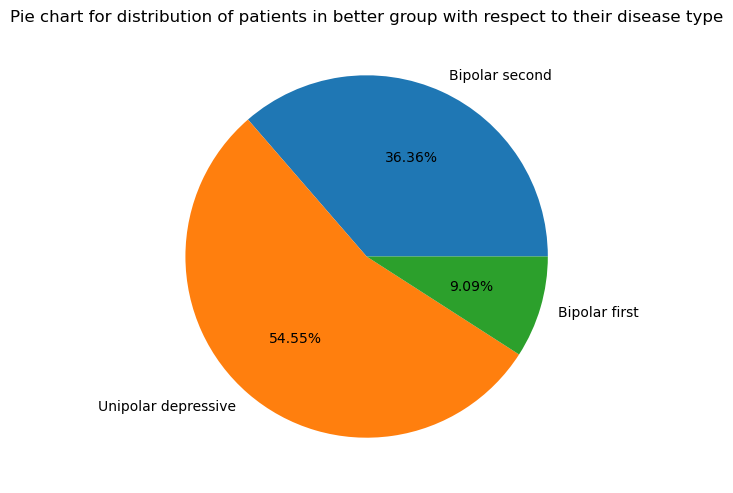

In [74]:
pie_for_afftype(helped, 'better')

Patients from all groups proved that it is possible to get good results after treatment, mostly unipolar depressive as dominant type of disease

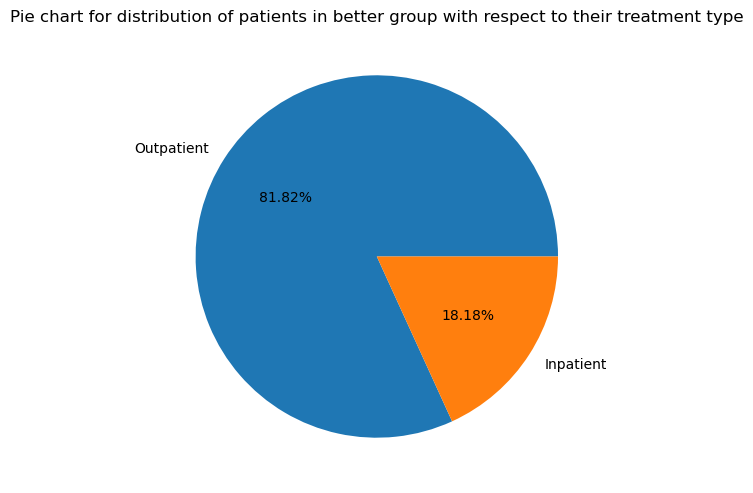

In [75]:
pie_for_treatment(helped, 'better')

Yeah, I think if patient would  be treated in hospital, he has high chances to show good results

### Finally, patients whose final result is not so far from starting point

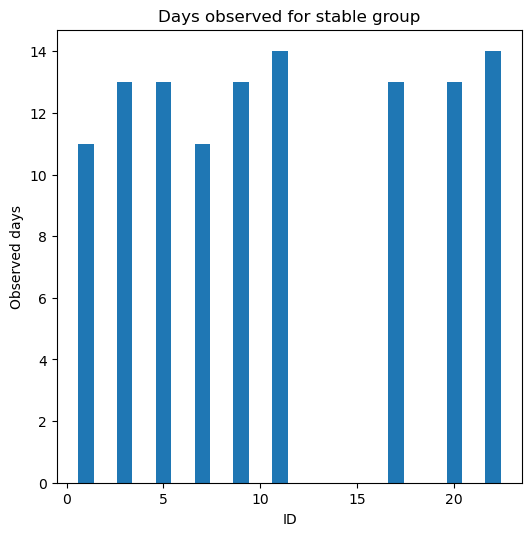

In [76]:
bar_for_days(stand, 'stable') 

We see that mostly they were observed in standard range, every patient

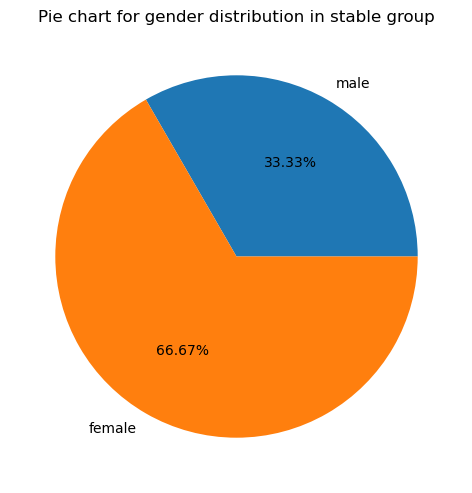

In [77]:
pie_for_gender(stand, 'stable')

Big oof. As we noticed women mostly are not showing good improvements. I am not a doctor but obviously men and women express and feel differently due to links in brain which may react differently on same treatment

It may also be that group that showed good improvements are single and jobless which help to focus on treatment.

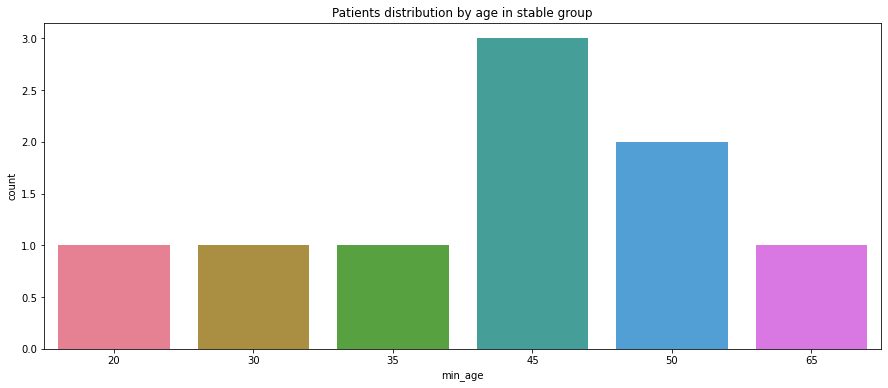

In [78]:
countplot_for_ages(stand, 'stable')

This one is reversed from previos count plot and left skewed. May be, older you are harder to treated?

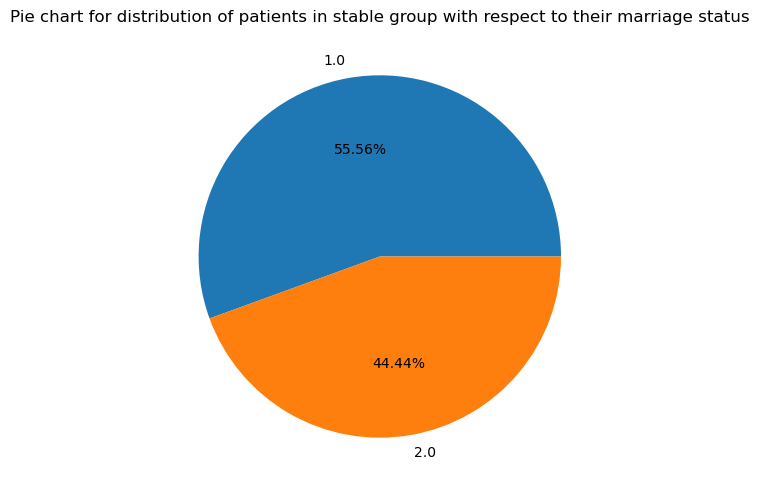

In [79]:
pie_for_marriage(stand, 'stable')

Over 50% are not single

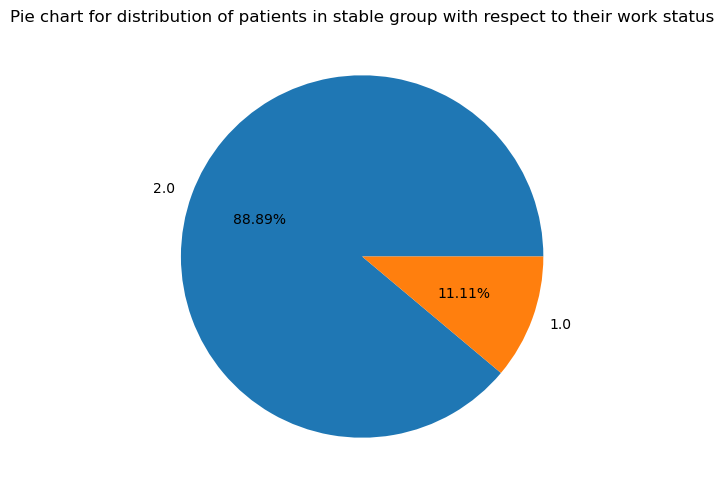

In [80]:
pie_for_work(stand, 'stable')

1 person works, but mostly group consists from unemployeed patients

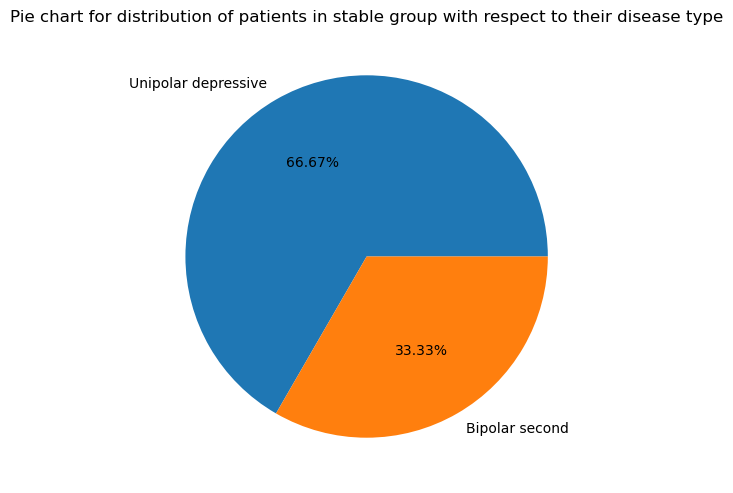

In [81]:
pie_for_afftype(stand, 'stable')

Standard distribution of data

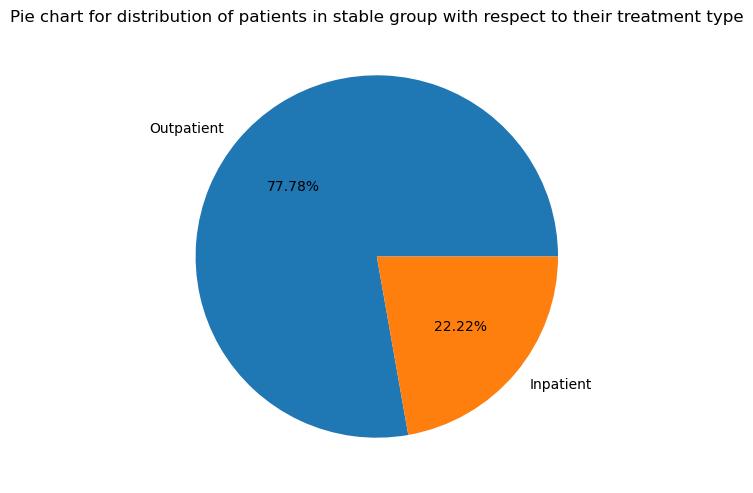

In [82]:
pie_for_treatment(stand, 'stable')

I believed that treating in hospital, highly effects to progress, but there is still patients with stable MADRS scores

In [83]:
# Let me create one more attribute named: result: 0 for whom MADRS score got worsen, 5 for stable group and 10 for whom treatment helped

In [84]:
better, stable, worse
def results(value):
    if value in worse:
        return 0
    elif value in stable:
        return 5
    elif value in better:
        return 10
    else:
        return None
    
scores['result'] = scores['id'].apply(lambda x: results(x))

Results for today: 
    We can say that older you are harder to show good results
    Men are likely to show good improvemnets after treating rather than women
    Being single and unemployed would also increase chances to show good improvements
    Most standard days observed will show most stable changes

In [85]:
scores.to_pickle('pickled_scores.pkl')

Yeah work here is done. Next step would be analyzing each patient's condition by each minimute on their own files.